In [7]:
import numpy as np
import os
# matplotlib: 
import matplotlib.pyplot as plt

#Coviddetector
from coviddet.generator.dataset import Dataset
from coviddet.generator.dataloader import Dataloder
from coviddet.models.architecture import CovidClassifier

from tensorflow import keras

In [2]:
dataset_path = '../dataset.json'
dataset_images = '../../../covid_dataset/'

In [33]:
train, _, test = Dataset.create_datasets(dataset_images, dataset_path, 0, 0)

dataset length: 6054
Evaluation Cases: 0
Train cases: 6054
Validation cases: 0


In [4]:
test_datagenerator = Dataloder(test, batch_size=1, preprocessing='MinMax', shuffle=False, expanddims=True)

In [5]:
classifier = CovidClassifier()

2022-01-21 11:05:05.220269: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-21 11:05:06.080117: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38414 MB memory:  -> device: 0, name: A100-PCIE-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
2022-01-21 11:05:06.081835: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 38414 MB memory:  -> device: 1, name: A100-PCIE-40GB, pci bus id: 0000:c1:00.0, compute capability: 8.0


512.0
256.0
128.0
64.0
32.0
16.0
8.0
4.0


In [14]:
LR = 0.0001
optim = keras.optimizers.Adam(LR)
metrics = [keras.metrics.CategoricalAccuracy(name="categorical_accuracy", dtype=None), 
                        keras.metrics.Precision(name="precision"), 
                        keras.metrics.Recall(name="recall")]

classifier.compile(optimizer=optim,
                     loss='hinge', # default from_logits=False
                     metrics=metrics)

classifier.build(test_datagenerator[0][0].shape)

In [19]:
classifier.load_weights('/home/mstryja/projects/master_thesis_covid/trained_models/covid_classifier/model_weights')

In [21]:
scores = classifier.evaluate(test_datagenerator)

print("Loss: {:.5}".format(scores[0]))
for metric, value in zip(metrics, scores[1:]):
    print("mean {}: {:.5}".format(metric.name, value))

2022-01-21 11:19:31.429556: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8101


  3/200 [..............................] - ETA: 16s - loss: 0.7500 - categorical_accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000  

2022-01-21 11:19:32.800004: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


200/200 [==============================] - 37s 171ms/step - loss: 1.0050 - categorical_accuracy: 0.4900 - precision: 0.4900 - recall: 0.4900
Loss: 1.005
mean categorical_accuracy: 0.49
mean precision: 0.49
mean recall: 0.49


In [50]:
A = train.analyse_dataset_labels()

In [51]:
idxs = np.where(A < A.max())

In [53]:
d = []
for i in idxs:
    d.append(np.floor(A.max()/A[i]))

In [54]:
d

[array([6., 2., 1.])]

In [55]:
import albumentations as A

In [57]:
X = train[4]

In [59]:
X[0]

array([[104, 102, 101, ...,  74,  73,  80],
       [102, 102, 103, ...,  68,  74,  80],
       [103, 103, 107, ...,  67,  72,  77],
       ...,
       [129, 136, 136, ...,  70,  70,  69],
       [133, 136, 133, ...,  74,  70,  69],
       [130, 136, 136, ...,  77,  70,  71]], dtype=uint8)

In [77]:
transform = A.Compose([
    # A.RandomCrop(width=256, height=256),
    A.HorizontalFlip(p=0.7),
    A.RandomBrightnessContrast(p=0.1),
])

In [78]:
transformed = transform(image=X[0])

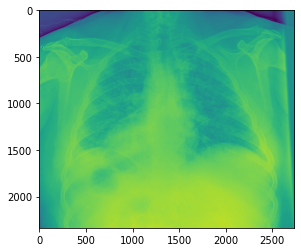

In [79]:
plt.imshow(transformed['image'])